In [8]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

In [9]:
url = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv"
df = pd.read_csv(url, header=None, error_bad_lines=False)

X = df.iloc[:, :13]
y = df.iloc[:, 13]

X = X.replace(to_replace="?", value=0)
y = np.where(y > 0, 0, 1)

In [10]:
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

In [11]:
start_time = time.time()
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)
elapsed_time = time.time() - start_time

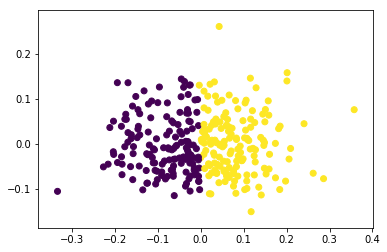

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [13]:
print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred, y))
print("runtime: {:.6f}".format(elapsed_time))

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99
runtime: 0.051660


In [14]:
start_time = time.time()
mb_km = MiniBatchKMeans(init="random", n_clusters=2, batch_size=200)
mb_km.fit(X_pca)
predict_mini = mb_km.predict(X_pca)
elapsed_time = time.time() - start_time

print("Comparing k-means and mini batch k-means solutions:")
print(pd.crosstab(predict_mini, y_pred))
print("runtime: {:.6f}".format(elapsed_time))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      149   14
1        0  140
runtime: 0.021208


## Drill: More clusters?

In [15]:
distortions =[]
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X_pca)
    distortions.append(km.inertia_)

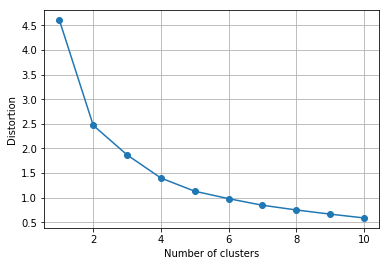

In [16]:
plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.grid()
plt.show()

About 5 or 6?

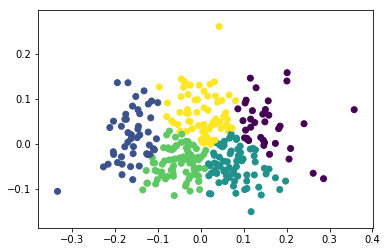

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28


In [17]:
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()
print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred, y))

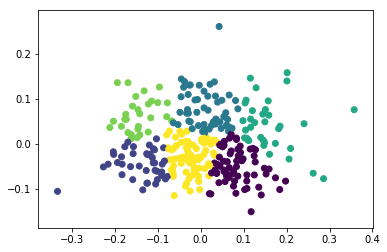

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


In [18]:
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()
print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred, y))